<a href="https://colab.research.google.com/github/Dyl-cmyk/datascience/blob/Assignments-Due/Unit6ExercisesLauro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

-

**Ans 1**:

No, elpd_loo is used to compare two models and thus is not helpful with one model

**Task2**:

Describe overfitting, in the context of this course

**Ans 2**:

overfitting is the idea of using too many pieces of data that may not be related to what the model is looking for. This can distract the model if overfitting occours and my lead it to draw incorrect or inaccurate conclusions about or data as a result


**Task3**:

How do we mitigate overfitting?

**Ans 3**:

Overfitting can be midigated by making the model more specific such as reducing multiple linear perdictors, selecting a model with the smallest number of varibles, and increasing target accept requirements

**Task4**:

How do we mitigate underfitting?

underfitting can be mitigated by using loo to find out which of our models is best for being accurate without cutting out an excessive or hurtful amount of data

**Task5**:

Why would we want more than one predictor in a model?

more than one perdictor in our model is helpful because sometimes more than one "perdictor" will cause a "posterior" to happen. For example humidity (our posterior) is affected by days since last rainfall (perdictor), BUT a more accurate model would be using days since last rainfall AND temprature since last rainfall (second perdictor).

**Task6**:

Can we have too many predictors? How would we now?

too many perdictors is indeed possible. This is just overfitting. This can be seen in our elpd_loo having a marginal positive gain from one perdictor to two perdictors. BUT MORE importantly you have to use your reason to see that __ perdictor is NOT contributing that much and is most likley an overfit. This can also be aided by a drawing a causual diagram

**Task7**:

What is variable selection, and how does it work?

varible selection is the process of deciding which varible Do and Do Not help the model come to an accurate conclusion. It, like figuring out if you have too many perdictors can be done by drawing causual diagrams and by looking at elpd_loo results. Varible selection is mostly done with YOUR reason using YOUR conclusions, though.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

1. This model actually has the most uniform confidence in it's perdictions, but the lowest "maximum confidence". This could be a good thing or a bad thing depending on your circumstances. It also has its "maximum confidence" around 60-70% FT% instead of 70-80% like the other two. This is a minor change, but one Id like to note
2. This model changed how the positions where viewed in their FG% (made PF seem more likley to have a higher FT% than some of the other positions.) It also increased its "maximum confidence" while dropping its "minimum confidence".
3. This model expanded on the canges made from model 1 -> 2 by further increasing "maximum confidence" while continuing to decrease its "minimum confidence"

Similarities:

All of the models show that there was an inital negative slope, and as the model "strength" increases we see this slope being motified more and more

All of the models also show some amount of correlation between FT% and 3pts even if it's basicaly none

All of the models have the most confidence in their perdictions around the 60-80% FT% mark

All of the models have centers as having the highest FG% in relation to their FT%

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

We can visualize multiple linear regression models as pieces of the whole model. Basically we cut a 5d model into 5 or so 2d models.

No we cannot visualize an entire model all at once because most of them have more than 3 perdictors and we only have 3 dimensions.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

###Clutter

In [1]:
!pip install bambi

In [2]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-i2r92k29
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-i2r92k29
  Resolved https://github.com/pydata/xarray.git to commit 2c8b6e6942e537b24cc09adc5204d6100d2843aa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb

In [30]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [26]:
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


In [31]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp", "3PA":"trePA"}, inplace=True)

###1

In [36]:
#define the model
model_bb = bmb.Model("`FGp` ~ `FTp` + Pos", data=bb)
#fit the model
idata_basketball = model_bb.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

###2.

In [23]:
#define the model, but as a hierarchy
model_basketball_h = bmb.Model("`FGp` ~ (`FTp`|Pos)", data=bb)
#create the model
idata_basketball_h = model_basketball_h.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 130 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


###3.

In [25]:
#define the model; bb_inter stands for baskeball interaction
model_bb_inter = bmb.Model("`FGp` ~ `FTp` + Pos + `FTp`:Pos", data=bb)
#create the model
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

###4.

In [33]:
#define the model; bb_inter stands for baskeball interaction
model_bb_inter3 = bmb.Model("`FGp` ~ `FTp` + Pos + trePA + `FTp`:Pos:trePA", data=bb)
#create the model
idata_bb_inter3 = model_bb_inter3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

###5.

In [34]:
#define the model; bb_inter stands for baskeball interaction
model_bb_inter2 = bmb.Model("`FGp` ~ `FTp` + Pos + trePA + Pos:trePA", data=bb)
#create the model
idata_bb_inter2 = model_bb_inter2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

###Comparison

In [37]:
cmp_df_bmb = az.compare( {"Categorical Perdictor":idata_basketball,"hierarchy":idata_basketball_h, "Inter FT-Pos":idata_bb_inter, "Inter 3 Perdictors": idata_bb_inter3, "Inter 3PA-Pos":idata_bb_inter2} )
cmp_df_bmb

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Inter FT-Pos,0,531.531326,13.971984,0.000000,6.965053e-01,15.235954,0.000000,False,log
Inter 3 Perdictors,1,531.364554,14.134909,0.166772,0.000000e+00,15.230375,0.128512,True,log
Inter 3PA-Pos,2,529.876684,12.698176,1.654643,3.034947e-01,15.843700,2.993714,False,log
hierarchy,3,508.494491,13.799644,23.036835,2.282463e-15,17.138269,6.956431,False,log
Categorical Perdictor,4,507.205346,8.422634,24.325981,0.000000e+00,16.110149,7.016373,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

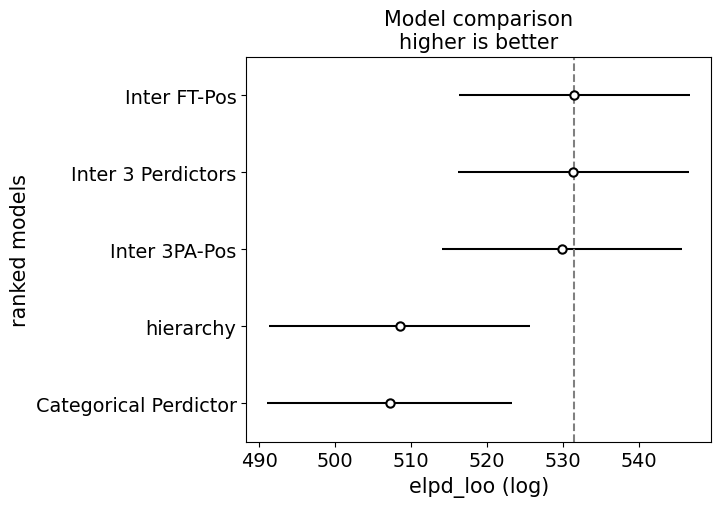

In [38]:
az.plot_compare(cmp_df_bmb)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

According to this metric the model with the interaction of FT percentage and position is the best one. This is likley because certian positions shoot Free throws more than others, in addtion to shooting more in general vs layups or little shooting.